# SWMAL Exercise

Lasses CNN opgave

## Convolutional Neural Networks (CNNs)

Excercise 9, p.496 2nd./p.535 3rd. [HOML] (slighty modified):

**"9. Build an CNN via the Keras API and try to achieve the highest possible accuracy on MNIST."**

For the journal:

- write an introduction to CNNs (what are CNNs, what is a convolution layer, etc..),
- document your experiments towards the end-goal of reaching 'a high accuracy' (what did you try, what work/did not work),
- document how you use '_generalization_' in your setup (us of simple hold-out/train-test split or k-fold, or etc..),
- produce some sort of '_learning-curve_' that illustrates the drop in cost- or increase in score-function with respect to, say training iteration (for inspiration see fig 4.20, 10-12 or 10.17 in [HOML]),
- document the final CNN setup (layers etc., perhaps as a graph/drawing),
- discus on your iterations towards the end-goal and other findings you had,
- and, as always, write a conclusion.

If you use a code template from slides, HOML or the internet, then remember to add a reference to the original work in you journal.


## Introduction to CNNs

Convolutional Neural Networks, or CNN's, are a class of neural networks, that work specifically well on tasks such as image recognition, speech recognition, object detection, and other similar tasks. In general, it is good at working with data that comes in a grid-like structure, since it works in 2D instead of 1D.

A CNN consists of several convolutional layers. A Convolutional layer is a layer of neurons, each looking at some smaller part of the data we want to analyze. Eg. if the data is an image, then a neuron might look at a small square of pixels in the corner, and the next neuron will look at the next small square of pixels, and so on. And then in the next convolutional layer, each neuron looks at a small subset of neurons from layer 1. The step size between each field that a neuron is connected to, is called the _stride_, as shown in the image below

<img src="Figs/CNN_Architecture.png" alt="CNN layer structure" width="500"/>

This convolution can be done using a kernel, which is a matrix of weights, corresponding to how much each field in the lower layer should 'matter', in the final value used in the upper layer on the image above.

A CNN can also have up to several pooling layers in its architecture. These layers are present to reduce the computational complexity of the CNN, as it can get extremely high, even with small sets of data. The idea is to reduce the dimensions of the feature maps, which can be done in some different ways. One of the most common forms is called _Max Pooling_, which is where the max value from a small region is chosen as that regions only data point. If the region is a 2x2 of inputs, then we have effectively reduced our input size by 75%.

#### Sources:

Chapter 14, HOML

Lesson 7 slides


In [16]:
import keras
from keras import layers
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Generalization
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]

x_train = x_train.astype("float32") / 255.0
x_val = x_val.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

model = keras.Sequential([
    layers.Conv2D(filters=8, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.BatchNormalization(),
    layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPool2D((2,2)),
    
    layers.Dropout(0.25),
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    layers.BatchNormalization(),
    
    layers.Flatten(),
    layers.Dense(units=128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(units=10, activation='softmax'),
])

model.summary()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=["sparse_categorical_accuracy"])

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val), callbacks=[callback])

results = model.evaluate(x_test, y_test)

/home/lassebp7/anaconda3/lib/python3.13/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_27 (Conv2D)              │ (None, 26, 26, 8)      │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 26, 26, 8)      │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 24, 24, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 24, 24, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 12, 12, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 12, 12, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 10, 10, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 10, 10, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 128)            │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 417,130 (1.59 MB)

 Trainable params: 417,018 (1.59 MB)

 Non-trainable params: 112 (448.00 B)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 23ms/step - loss: 0.2287 - sparse_categorical_accuracy: 0.9337 - val_loss: 0.0682 - val_sparse_categorical_accuracy: 0.9813
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - loss: 0.1094 - sparse_categorical_accuracy: 0.9686 - val_loss: 0.0470 - val_sparse_categorical_accuracy: 0.9857
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - loss: 0.0840 - sparse_categorical_accuracy: 0.9750 - val_loss: 0.0483 - val_sparse_categorical_accuracy: 0.9872
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - loss: 0.0707 - sparse_categorical_accuracy: 0.9793 - val_loss: 0.0480 - val_sparse_categorical_accuracy: 0.9882
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - loss: 0.0605 - sparse_categorical_accuracy: 0.9821 - val_loss: 0.0393 - val_sparse_categorical_accuracy: 0.9911
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - loss: 0.0515 - sparse_categorical_accuracy: 0.9848 - val_loss: 0.0453 - val_sparse_categoric

## Questions

### Usage of generalization

In the CNN, generalization is used to divide the dataset into training-, test- and validationdata. The training data is of course used to train the model, but the Keras Sequential class also supports using validation data while its training. It uses this to show the loss and accuracy value while its training, on data that it isnt used for training. We can use this to see how well the model generalizes during training.

If we see that the validation accuracy falls, while the training accuracy increases, we are likely overfitting, and we can catch it earlier than if we did not use a validation set while training.

Then we end it with testing our model on the test data, where we also get a loss and accuracy value. Here we measure how well the model does on completely new data, that wasnt used for either training or validation.

#### Sources

https://keras.io/guides/training_with_built_in_methods/
https://datascience.stackexchange.com/questions/18339/why-use-both-validation-set-and-test-set

### Optimization of results towards high accuracy

The first model that was tested, which's code was largely inspired by the slides, looking like this:

```python
model = keras.Sequential([
    layers.Conv2D(filters=6, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.AveragePooling2D(pool_size=(3,3)),
    layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu'),
    layers.AveragePooling2D(pool_size=(3,3)),
    layers.Flatten(),
    layers.Dense(units=120, activation='relu'),
    layers.Dense(units=84, activation='relu'),
    layers.Dense(units=10, activation='softmax'),
])
```

#### Table of iterations towards a high accuracy

| Change                                                                                                     | Loss  | Accuracy | Comment                                                                                                                  |
| ---------------------------------------------------------------------------------------------------------- | ----- | -------- | ------------------------------------------------------------------------------------------------------------------------ |
| First model                                                                                                | 0.064 | 0.981    | Benchmark for other results                                                                                              |
| Increase epoch count from 5 to 10                                                                          | 0.61  | 0.983    | Improvement, but also significant increase in runtime.                                                                   |
| Change AveragePooling2D layer to MaxPooling2D                                                              | 0.087 | 0.974    | Worse than benchmark result, therefore reverted.                                                                         |
| Change AveragePooling2D to BatchNormalization, increase filter count from 6, 16 to 16, 32.                 | 0.108 | 0.975    | Increased loss and decreased accuracy. Also increased time to train significantly. Reverted.                             |
| Remove middle Dense layer, add two dropout layers.                                                         | 0.052 | 0.984    | Improvement to both loss and accuracy, changes kept.                                                                     |
| Trying with epoch=10 and callback function to early exit if no improvement to val_loss over 3 epochs.      | 0.052 | 0.983    | No improvement to be found.                                                                                              |
| Added another convolution2D layer with 10 filters + batch normalization after.                             | 0.040 | 0.988    | Best result so far. Changes kept.                                                                                        |
| Changed filter count from 6, 16, 10 to 8, 16, 24, and added a MaxPool2D layer between conv. layer 2 and 3. | 0.030 | 0.991    | First time accuracy went over 0.99, so definitely the best result we achieved. The loss is also the lowest we have seen. |

### Final CNN Setup

```python
model = keras.Sequential([
    layers.Conv2D(filters=8, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.BatchNormalization(),

    layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPool2D((2,2)),

    layers.Dropout(0.25),
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    layers.BatchNormalization(),

    layers.Flatten(),
    layers.Dense(units=128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(units=10, activation='softmax'),
])
```

### Graph of learning curve

Plotting code written by ChatGPT


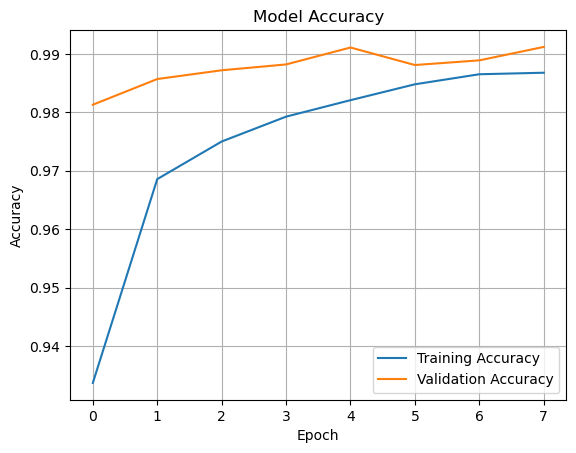

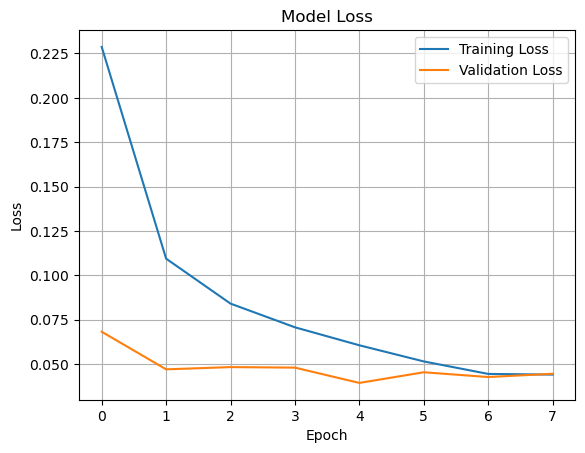

In [17]:
import matplotlib.pyplot as plt

# training & validation accuracy
plt.plot(history.history['sparse_categorical_accuracy'], label='Training Accuracy')
plt.plot(history.history['val_sparse_categorical_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# training & validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

We see that the training and validation accuracy goes up together, and then plateaus around 0.99 for the validation accuracy. This indicated that the model is learning well, and not overfitting. If the training accuracy kept on climbing, but the validation accuracy started falling, it would be a sign of overfitting.

The validation loss stays hovered around 0.03-0.05, while the training data lowers down to match it. When these two values have been close enough for 3 epochs, the models stops training due to lack of improvement.

### Conclusion

This exercise was about trying to create a convolutional neural network, and see how high accuracy we could get on the MNIST dataset. CNN's is a particularly good model to use for this dataset, since it is designed to process grid-structured data, which this dataset is.

Our CNN consists of convolution layers, which slide small filters (kernels) over the data, which detects features in the data. These features are then combined across layers to form higher-level representation of the data. We use several of these layers, but between each of them, we also use pooling layers, to decrease dimensionality and batch normalization, which stabilizes learning. We also use some dropout layers, which randomly deactivates some neurons, that in turn improves generalization.

We tried several different iterations of the model, adding/removing layers, changing hyperparameters, to see how the performance of the model changed. Our goal was to hit an accuracy of >0.99, which we eventually achieved.

In conclusion, using a CNN has given us the best result on the MNIST dataset so far, considerably better than the models we have tried previously on the dataset, like the linear regression.


## Sources

Lesson 7 slides 25 for starting code

For layer inspiration and model buildup
https://keras.io/guides/sequential_model/


| REVISIONS  |                                                                                                            |
| :--------- | :--------------------------------------------------------------------------------------------------------- |
| 2021-10-20 | CEF, initial version, clone from [HOML].                                                                   |
| 2021-10-26 | CEF, added learning curve item.                                                                            |
| 2022-01-25 | CEF, update to SWMAL F22.                                                                                  |
| 2023-03-08 | CEF, updated page no to HOML 3rd. ed., updated to SWMAL F23.                                               |
| 2023-03-15 | CEF, removed wording "from scratch", replaced with "via the Keras API" and added comment about references. |
| 2024-09-11 | CEF, updated page refefences.                                                                              |
